In [12]:
import numpy as np
from matplotlib import pyplot as plt
import time

np.random.seed(time.gmtime())

## Parameters

In [13]:
N = 3         # number of doors
M = 100000    # number of simulations

# 1) One simulation

## Initial Setup

In [14]:
doors = np.empty(N, dtype='object')
for i in range(len(doors)): doors[i] = 'goat'

labels = np.arange(N)
    
k_car = np.random.choice(labels)    
doors[k_car] = 'car'

doors

array(['car', 'goat', 'goat'], dtype=object)

## The Game 

The competitor chooses one door, which remains closed

In [15]:
k_chosen = np.random.choice(labels) 

if k_chosen==k_car : doors[k_chosen] = 'car&chosen'
else : doors[k_chosen] = 'goat&chosen'

doors

array(['car&chosen', 'goat', 'goat'], dtype=object)

The host, who knows were the car is, opens $N-2$ doors with goats behind them

In [16]:
labels = np.delete(labels, (k_car, k_chosen))

for i in range(len(doors)-2):
    j = np.random.choice(labels) 
    doors[j] = 'opened'
    
doors

array(['car&chosen', 'goat', 'opened'], dtype=object)

The competitor can change his chosen door

In [17]:
Change = True

In [18]:
if Change==True :    
    if k_chosen==k_car : 
        for i in range(len(doors)): 
            if doors[i]=='goat' : k_closed=i
        doors[k_chosen] = 'car'
        doors[k_closed] = 'goat&chosen'
    else :
        doors[k_chosen] = 'goat'
        doors[k_car] = 'car&chosen'
        
doors

array(['car', 'goat&chosen', 'opened'], dtype=object)

# 2) Repeated simulations

In [19]:
def Simulation(N, Change):
    doors = np.empty(N, dtype='object')
    for i in range(len(doors)): doors[i] = 'goat'
    
    labels = np.arange(N)
    k_car = np.random.choice(labels)     
    doors[k_car] = 'car'
    
    k_chosen = np.random.choice(labels) 
    if k_chosen==k_car : doors[k_chosen] = 'car&chosen'
    else : doors[k_chosen] = 'goat&chosen'
    
    labels = np.delete(labels, (k_car, k_chosen))
    
    for i in range(len(doors)-2):
        j = np.random.choice(labels) 
        doors[j] = 'opened'
            
    if Change==True : 
        if k_chosen==k_car : 
            for i in range(len(doors)): 
                if doors[i]=='goat' : k_closed=i
            doors[k_chosen] = 'car'
            doors[k_closed] = 'goat&chosen'
            temp = k_chosen
            k_chosen = k_closed
            k_closed = temp
        else :
            doors[k_chosen] = 'goat'
            doors[k_car] = 'car&chosen'
            temp = k_chosen
            k_chosen = k_car
            k_car = temp
    
    if doors[k_chosen]=='car&chosen' : result = True
    else : result = False
            
    return result

In [20]:
counter_change = np.zeros(M)
counter_nochange = np.zeros(M)

for i in range(M):
    if i!=0 :
        counter_change[i] = counter_change[i-1]
        counter_nochange[i] = counter_nochange[i-1]
    
    if Simulation(N, True)==True : counter_change[i] += 1
    if Simulation(N, False)==True : counter_nochange[i] += 1

In [21]:
for i in range(M):
    counter_change[i] /= i+1
    counter_nochange[i] /= i+1

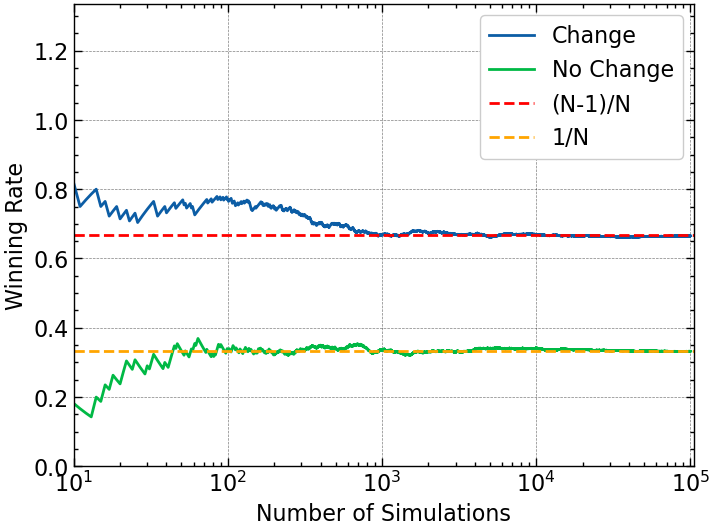

In [22]:
import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 

x = np.arange(0, M, dtype=int)

plt.plot(x, counter_change, label='Change')
plt.plot(x, counter_nochange, label='No Change')
plt.axhline(y=(N-1)/N, color='red', linestyle='--', label='(N-1)/N')
plt.axhline(y=1/N, color='orange', linestyle='--', label='1/N')
plt.xlim(10)
plt.ylim(0, 2*(N-1)/N)
plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Winning Rate')
plt.legend()